First we will import somme library and read dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("income data.csv")
df.head(5)

,Age,Workclass,Education,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We will do some overview of dataset

In [3]:
df.shape

(32561, 13)

we has 32561 observations and the number of variable is 13

In [4]:
for col in df:
    print("columns " + str(col) + " has " + str(len(df[col].unique())) + " levels")
    print(df[col].unique())

columns Age has 73 levels
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
columns  Workclass has 9 levels
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
columns  Education has 16 levels
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
columns  Marital-status has 7 levels
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
columns  Occupation has 15 levels
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspc

We can see that "age", "capital_gain", "capital_loss" and "hours_per_week" are type integer whereas all the other variables are factor variables with different number. We see that some columns have a level denoted by "?" are missing value

* Cleaning missing values

In [5]:
object_col = df.columns
object_col

Index(['Age', ' Workclass', ' Education', ' Marital-status', ' Occupation',
       ' Relationship', ' Race', ' Gender', ' Capital-gain', ' Capital-loss',
       ' Hours-per-week', ' Native-country', ' Income'],
      dtype='object')

We will fix the value of each records in the good form

In [6]:
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['Age', 'Workclass', 'Education', 'Marital-status', 'Occupation',
       'Relationship', 'Race', 'Gender', 'Capital-gain', 'Capital-loss',
       'Hours-per-week', 'Native-country', 'Income'],
      dtype='object')

As we saw in the part overview of the dataset we need to fix the values in each columns in good form too

In [7]:
object_col = df.select_dtypes(include=object).columns.tolist()
for col in object_col:
        df[col] = df[col].str.replace(' ', '')
        print(df[col].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' '

Now we mark all "?" as NaN (not available )

In [8]:
for col in object_col:
    df.loc[df[col] == '?', col] = np.nan

We want to see the percentage of Nan in each column

In [9]:
col_missing_pct = df.isna().sum()/df.shape[0]
col_missing_pct.sort_values(ascending=False)

Occupation        0.056601
Workclass         0.056386
Native-country    0.017905
Income            0.000000
Hours-per-week    0.000000
Capital-loss      0.000000
Capital-gain      0.000000
Gender            0.000000
Race              0.000000
Relationship      0.000000
Marital-status    0.000000
Education         0.000000
Age               0.000000
dtype: float64

The largest missing percentage by column level is 5% in dataset, and most columns are complete enough. Therefore, we remove all na value

In [10]:
df = df.dropna(axis=0, how="any")

In [11]:
col_missing_pct = df.isna().sum()/df.shape[0]
col_missing_pct.sort_values(ascending=False)

Income            0.0
Native-country    0.0
Hours-per-week    0.0
Capital-loss      0.0
Capital-gain      0.0
Gender            0.0
Race              0.0
Relationship      0.0
Occupation        0.0
Marital-status    0.0
Education         0.0
Workclass         0.0
Age               0.0
dtype: float64

Now we will do some transformation in the data to have a good data for classification

In [12]:
df.describe()

,Age,Capital-gain,Capital-loss,Hours-per-week
count,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1092.007858,88.372489,40.931238
std,13.134665,7406.346497,404.298370,11.979984
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,47.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


Box plots are often used to show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.

Text(0, 0.5, 'Working hours per week')

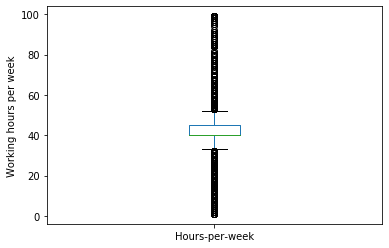

In [13]:
df["Hours-per-week"].plot.box()
plt.ylabel("Working hours per week")

The filled black dots are the so-called outliers, i.e. data points that fall below the lower whisker or above the upper whisker. Therefore, we will group the working hours in 5 categories which we consider relevant:
_less than 40 hours per week
_between 40 and 45 hours per week
_between 45 and 60 hours per week
_between 60 and 80 hours per week, and
_more than 80 hours per week,

In [14]:
def label_hours_per_week (row):
        if row["Hours-per-week"] < 40 :
                  return "less_than_40"
        elif row["Hours-per-week"] >= 40 and row["Hours-per-week"] <= 45:
              return "between_40_and_45"
        elif row["Hours-per-week"] > 45 and row["Hours-per-week"] <= 60:
              return "between_45_and_60"
        elif row["Hours-per-week"] > 60 and row["Hours-per-week"] <= 80:
              return "between_60_and_80"
        elif row["Hours-per-week"] > 80:
              return "more_than_80"

In [15]:
df["Hours-per-week"] = df.apply(lambda row: label_hours_per_week(row), axis=1)
round(df["Hours-per-week"].value_counts(normalize=True) * 100,2)

between_40_and_45    55.06
less_than_40         22.26
between_45_and_60    19.20
between_60_and_80     2.84
more_than_80          0.65
Name: Hours-per-week, dtype: float64

We can see the majority of people work between 40 and 45 hours a week, and about 0.65 % people work more than 80 hours a week

In [16]:
num_col = df.select_dtypes(include="int64").columns.tolist()
skew_feats = df[num_col].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_feats})
skewness

,Skew
Capital-gain,11.902682
Capital-loss,4.526380
Age,0.530228


we can see that capital-gain and capital-loss in the table describe we have so many 0. We will show the percentage of value 0 in each column.

In [17]:
df["Capital-gain"] .value_counts(normalize=True)*100

0        91.585439
15024     1.117300
7688      0.895166
7298      0.795703
99999     0.490684
           ...    
401       0.003315
22040     0.003315
4931      0.003315
1455      0.003315
1639      0.003315
Name: Capital-gain, Length: 118, dtype: float64

In [18]:
df["Capital-loss"] .value_counts(normalize=True)*100

0       95.268881
1902     0.643193
1977     0.537100
1887     0.513892
1848     0.165772
          ...    
419      0.003315
1411     0.003315
1539     0.003315
2472     0.003315
2467     0.003315
Name: Capital-loss, Length: 90, dtype: float64

We will apply logarithmic transformation on the skewed data. Here is capital-gain and capital-loss. 

In [19]:
from sklearn.preprocessing import MinMaxScaler

col_skewed = ["Capital-gain", "Capital-loss"]
feature_raw = df.drop('Income', axis=1)
features_log_transformed = pd.DataFrame(data=feature_raw)
features_log_transformed[col_skewed] = feature_raw[col_skewed].apply(lambda x: np.log(x + 1))


We see that the coefficient of skewness decreases

In [30]:
num_col = features_log_transformed.select_dtypes(include="float64").columns.tolist()
skew_feats = features_log_transformed[num_col].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_feats})
skewness

,Skew
Capital-loss,4.272387
Capital-gain,3.073208
Age,0.530228


In addition to performing transformations on features that are highly skewed, here we perform a type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as 'capital-gain' or 'capital-loss' above); however, it is useful to scale the input attributes for a model that relies on the magnitude of values.

In [21]:
scaler = MinMaxScaler() 
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[num_col] = scaler.fit_transform(features_log_transformed[num_col])
df[num_col] = features_log_minmax_transform[num_col]

In [22]:
round(df["Native-country"].value_counts(normalize=True) * 100,2)

United-States                 91.19
Mexico                         2.02
Philippines                    0.62
Germany                        0.42
Puerto-Rico                    0.36
Canada                         0.35
El-Salvador                    0.33
India                          0.33
Cuba                           0.31
England                        0.29
Jamaica                        0.27
South                          0.24
China                          0.23
Italy                          0.23
Dominican-Republic             0.22
Vietnam                        0.21
Guatemala                      0.21
Japan                          0.20
Columbia                       0.19
Poland                         0.19
Haiti                          0.14
Taiwan                         0.14
Iran                           0.14
Portugal                       0.11
Nicaragua                      0.11
Peru                           0.10
Greece                         0.10
France                      

As we check, columns "Native_country" has 41 levels, this will complicate unnecessarily the analysis and might lead to overfitting because some country has a few records in datasets (like Holand-Netherlands). Hence, it is better to group the native countries into several global regions. 

In [23]:
def label_native_country(row):
        asia = ["Cambodia", "China", "Hong", "Laos", "Thailand","Japan", "Taiwan", "Vietnam","Philippines","India", "Iran","South"]
        europe = ["England", "Germany", "Holand-Netherlands", "Ireland", "France", "Greece", "Italy", "Portugal", "Scotland","Poland", "Yugoslavia", "Hungary"]
        america = [ "Ecuador","Peru","Columbia","Canada", "Cuba", "Guatemala", "Jamaica", "Nicaragua", "Puerto-Rico",  "Dominican-Republic", "El-Salvador", "Haiti", "Honduras", "Mexico", "Trinadad&Tobago"]
        US = ['Outlying-US(Guam-USVI-etc)', 'United-States']
        if row["Native-country"] in asia:
            return "Asia"
        elif row["Native-country"] in europe:
            return "Europe"
        elif row["Native-country"] in america:
            return "America_without_USA"
        elif row["Native-country"] in US:
            return 'United-States'
        #else:
            #print(row["Native-country"])

In [24]:
df["Native_region"] = df.apply(lambda row: label_native_country(row), axis=1)
round(df["Native_region"].value_counts(normalize=True) * 100,2)

United-States          91.23
America_without_USA     4.79
Asia                    2.34
Europe                  1.63
Name: Native_region, dtype: float64

In [25]:
for col in df:
    print("columns " + str(col) + " has " + str(len(df[col].unique())) + " levels")
    print(df[col].unique())

columns Age has 72 levels
[0.30136986 0.45205479 0.28767123 0.49315068 0.15068493 0.2739726
 0.43835616 0.47945205 0.19178082 0.34246575 0.17808219 0.08219178
 0.20547945 0.23287671 0.10958904 0.35616438 0.31506849 0.50684932
 0.24657534 0.57534247 0.53424658 0.02739726 0.04109589 0.38356164
 0.06849315 0.42465753 0.05479452 0.09589041 0.54794521 0.36986301
 0.32876712 0.16438356 0.4109589  0.39726027 0.26027397 0.84931507
 0.1369863  0.01369863 0.21917808 0.80821918 0.52054795 0.60273973
 0.7260274  0.64383562 0.73972603 0.67123288 0.46575342 0.56164384
 0.12328767 0.         0.5890411  1.         0.79452055 0.65753425
 0.82191781 0.61643836 0.63013699 0.68493151 0.78082192 0.75342466
 0.71232877 0.69863014 0.76712329 0.87671233 0.83561644 0.97260274
 0.8630137  0.91780822 0.90410959 0.93150685 0.89041096 0.94520548]
columns Workclass has 7 levels
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
columns Education has 16 levels
['Bachel

In [26]:
income = df['Income']
features = df.drop(['Income', 'Native-country'], axis=1)

There are some features for each record that are non-numeric. Learning algorithms expect input to be numeric, which requires that non-numeric features (called categorical variables) be converted. Here convert categorical variables by using the one-hot encoding scheme.

In [27]:
from sklearn.preprocessing import OneHotEncoder

cat_feats = features.dtypes[features.dtypes=='object'].index.tolist()
cat_idx = [features.columns.get_loc(col) for col in cat_feats]
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
encoded_cat_feats = encoder.fit_transform(features.loc[:,cat_feats])

cat_col_name = features.columns.get_values()[cat_idx].tolist()
encoded_cat_feats_name = encoder.get_feature_names(cat_col_name)

encoded_cat_feats_df = pd.DataFrame(encoded_cat_feats, columns=encoded_cat_feats_name)
encoded_cat_feats_df.head()

D:\python\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Education_10th,Education_11th,Education_12th,...,Gender_Male,Hours-per-week_between_40_and_45,Hours-per-week_between_45_and_60,Hours-per-week_between_60_and_80,Hours-per-week_less_than_40,Hours-per-week_more_than_80,Native_region_America_without_USA,Native_region_Asia,Native_region_Europe,Native_region_United-States
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
num_col =  features.dtypes[features.dtypes!='object'].index.tolist()
num_feats_df = features[num_col].reset_index()
# Concatenate numerical and encoded categorical features together
X = pd.merge(num_feats_df, encoded_cat_feats_df, left_index=True, right_index=True).drop('index', axis=1)
# Encode the 'income_raw' to numerical values
y = income.apply(lambda x: 1 if x == '>50K' else 0)
print("{} total features after one-hot encoding.".format(len(X.columns)))
# Display several rows of processed dataframe
X.head()

69 total features after one-hot encoding.


,Age,Capital-gain,Capital-loss,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,...,Gender_Male,Hours-per-week_between_40_and_45,Hours-per-week_between_45_and_60,Hours-per-week_between_60_and_80,Hours-per-week_less_than_40,Hours-per-week_more_than_80,Native_region_America_without_USA,Native_region_Asia,Native_region_Europe,Native_region_United-States
0,0.301370,2174,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.452055,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.287671,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.493151,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.150685,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
X.to_csv("data_preprocessing.csv",index = False)
y.to_csv("label.csv",index = False)

D:\python\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
